In [1]:
# Import Libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.others import daily_return,cumulative_return
from plotly.offline import init_notebook_mode
import cufflinks as cf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import requests
from bs4 import BeautifulSoup
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
# Webscrapping Wikipedia table to get the IBEX 35 components
page = requests.get("https://es.wikipedia.org/wiki/IBEX_35")
soup = BeautifulSoup(page.text, 'html.parser') 
table = soup.find('table', class_="wikitable sortable")

In [3]:
# Convert html table to dataframe
wiki = pd.read_html(str(table))
wiki = pd.concat(wiki)
wiki.head(40)

,Ticker,Empresa,Sede,Entrada,Sector[29]​,ISIN,Ponderación (Sep. 2022)
0,ANA,Acciona,Alcobendas,2015,Construcción,ES0125220311,112
1,ANE,Acciona Energía,Alcobendas,2022,Energías renovables,ES0105563003,36
2,ACX,Acerinox,Madrid,2015,"Mineral, metales y transformación",ES0132105018,49
3,ACS,ACS,Madrid,1998,Construcción,ES0167050915,203
4,AENA,Aena,Madrid,2015,Transporte y distribución,ES0105046009,351
5,AMS,Amadeus IT Group,Madrid,2011,Electrónica y software,ES0109067019,519
6,MTS,ArcelorMittal,Ciudad de Luxemburgo,2009,"Mineral, metales y transformación",LU1598757687,76
7,SAB,Banco Sabadell,Alicante,2004,Bancos y cajas de ahorro,ES0113860A34,141
8,SAN,Banco Santander,Santander,1992,Bancos y cajas de ahorro,ES0113900J37,1201
9,BKT,Bankinter,Madrid,1992,Bancos y cajas de ahorro,ES0113679I37,115


In [4]:
# Add .MC to all Tickers to use them on Yahoo Finance
wiki['Ticker'] = wiki['Ticker'].apply(lambda x: x+'.MC')
wiki.head()

,Ticker,Empresa,Sede,Entrada,Sector[29]​,ISIN,Ponderación (Sep. 2022)
0,ANA.MC,Acciona,Alcobendas,2015,Construcción,ES0125220311,112
1,ANE.MC,Acciona Energía,Alcobendas,2022,Energías renovables,ES0105563003,36
2,ACX.MC,Acerinox,Madrid,2015,"Mineral, metales y transformación",ES0132105018,49
3,ACS.MC,ACS,Madrid,1998,Construcción,ES0167050915,203
4,AENA.MC,Aena,Madrid,2015,Transporte y distribución,ES0105046009,351


In [5]:
# Get the data for the stock ^IBEX
ibex35_list = list(wiki['Ticker'])
ibex35_list.append('^IBEX')

In [6]:
# Save all the historical data
for stock in ibex35_list:
    data = yf.download(stock, progress=False)
    data.to_csv(f"../input/{stock}.csv",index=True)

num_files = len(os.listdir("../input")) 
print(f"{num_files} files downloaded")

36 files downloaded


In [27]:
# Configuration of different parameters of the notebook
ticker = 'BBVA.MC'
year = '2023'

In [28]:
# Check DataFrame
stock_ibex = pd.read_csv(f"../input/{ticker}.csv",index_col="Date",parse_dates=True)
stock_ibex.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,13.690602,13.757854,13.594527,13.623349,4.656136,8244257
2000-01-04,13.450416,13.536882,13.219837,13.267874,4.534645,8522096
2000-01-05,13.142977,13.210230,12.912399,12.970044,4.432855,12159826
2000-01-06,12.970044,12.970044,12.970044,12.970044,4.432855,0
2000-01-07,13.248659,13.248659,12.998866,13.133370,4.488675,62261944
2000-01-10,13.277482,13.277482,12.902791,12.922006,4.416435,58740351
2000-01-11,12.873969,12.893184,12.537709,12.662605,4.327779,6761292
2000-01-12,12.643391,12.643391,12.393597,12.518494,4.313641,8266754
2000-01-13,12.489672,12.537709,12.105374,12.211056,4.207705,9372669


In [35]:
# Check DataFrame tail
stock_ibex.tail(10)

,Open,High,Low,Close,Adj Close,Volume,MMA20,BB_Upper,BB_Lower,RSI,Daily_Return
Date,,,,,,,,,,,
2023-12-21,8.168,8.242,8.158,8.232,8.232,4612825,8.4451,8.742118,8.148082,46.535871,0.758877
2023-12-22,8.234,8.278,8.186,8.238,8.238,5924362,8.4375,8.747274,8.127726,46.914403,0.072881
2023-12-27,8.250,8.284,8.202,8.242,8.242,5985913,8.4296,8.750650,8.108550,47.182880,0.048552
2023-12-28,8.248,8.258,8.162,8.192,8.192,4264480,8.4099,8.738410,8.081390,44.175215,-0.606640
2023-12-29,8.194,8.266,8.182,8.226,8.226,4492141,8.3864,8.696405,8.076395,46.664938,0.415032
2024-01-02,8.280,8.482,8.272,8.426,8.426,12884145,NaN,NaN,NaN,NaN,NaN
2024-01-03,8.460,8.500,8.300,8.320,8.320,7949923,NaN,NaN,NaN,NaN,NaN
2024-01-04,8.348,8.472,8.336,8.460,8.460,6040776,NaN,NaN,NaN,NaN,NaN
2024-01-05,8.440,8.554,8.370,8.514,8.514,7361240,NaN,NaN,NaN,NaN,NaN


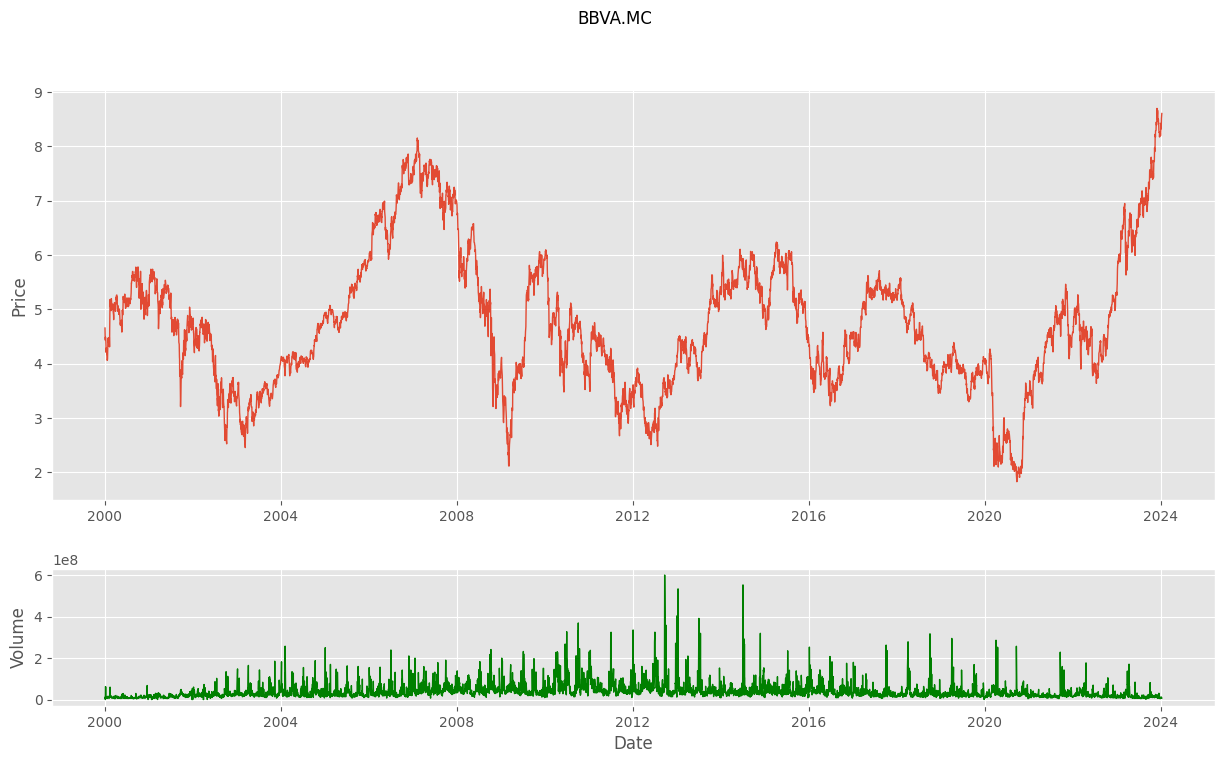

In [36]:
# Plot the adjusted close price of the ^IBEX
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8),sharex=True)

fig.suptitle(f"{ticker}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ibex['Adj Close'],linewidth=1)
axs[0].tick_params(labelbottom=True)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(stock_ibex['Volume'],linewidth=1,color='g')

plt.show()

In [37]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':3,'colspan':1}],[None],[None],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ibex.index,y=stock_ibex['Adj Close'],mode="lines",name='IBEX35'),row=1, col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ibex.index,y=stock_ibex['Volume'],mode="lines",name='Volume'),row=4, col=1)
fig.update_yaxes(title_text="Volume", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker}")

fig.show()

In [38]:
# Add Technical Analysis Indicators

# Modified Moving Average 20
stock_ibex['MMA20'] = stock_ibex['Adj Close'].loc[year].rolling(20).mean() #Adj Close 20 MA

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=stock_ibex["Adj Close"].loc[year], window=20, window_dev=2)

# Bollinger Bands
stock_ibex['BB_Upper'] = indicator_bb.bollinger_hband()
stock_ibex['BB_Lower'] = indicator_bb.bollinger_lband()

# Initialize RSI Indicator
indicator_rsi = RSIIndicator(close=stock_ibex["Adj Close"].loc[year], window=14)

# RSI
stock_ibex['RSI'] = indicator_rsi.rsi()

# Daily Return
stock_ibex['Daily_Return'] = daily_return(stock_ibex["Adj Close"].loc[year])

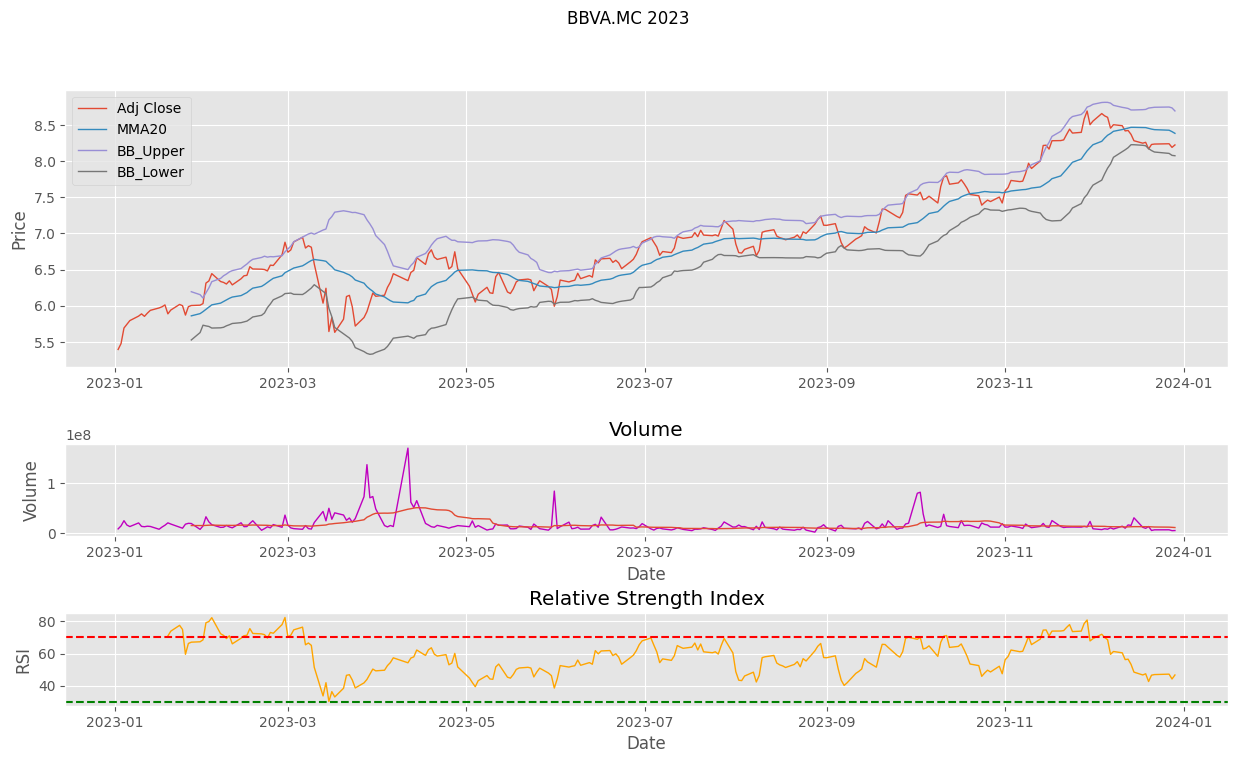

In [39]:
# Plot the adjusted close price of the ^IBEX for year
fig, axs = plt.subplots(3,1,gridspec_kw={'height_ratios': [3,1,1],'hspace':0.5},figsize=(15, 8),sharex=True)

# Graph 0
fig.suptitle(f"{ticker} {year}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ibex['Adj Close'].loc[year],linewidth=1)
axs[0].plot(stock_ibex['MMA20'],linewidth=1) 
axs[0].plot(stock_ibex['BB_Upper'],linewidth=1)
axs[0].plot(stock_ibex['BB_Lower'],linewidth=1)
axs[0].legend(['Adj Close','MMA20','BB_Upper','BB_Lower'])
axs[0].tick_params(labelbottom=True)

# Graph 1
axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].set_title('Volume')
axs[1].plot(stock_ibex['Volume'].loc[year],linewidth=1,color='m')
axs[1].plot(stock_ibex['Volume'].loc[year].rolling(20).mean(),linewidth=1) #Volume 20 MMA
axs[1].tick_params(labelbottom=True)

# Graph 2
axs[2].set_title('Relative Strength Index')
axs[2].set_ylabel("RSI")
axs[2].set_xlabel("Date")
axs[2].plot(stock_ibex['RSI'],color='orange',linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
axs[2].axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
axs[2].axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()

In [40]:
# Plot the adjusted close price of the ^IBEX for year
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':2,'colspan':1}],[None],[{'rowspan':1,'colspan':1}],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ibex['Adj Close'].loc[year].index,y=stock_ibex['Adj Close'].loc['2023'],mode="lines",name=f'{ticker}'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ibex['BB_Lower'].loc[year].index,y=stock_ibex['BB_Lower'].loc['2023'],mode="lines",name='BB_Lower'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ibex['BB_Upper'].loc[year].index,y=stock_ibex['BB_Upper'].loc['2023'],mode="lines",name='BB_Upper'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ibex['MMA20'].loc[year].index,y=stock_ibex['MMA20'].loc['2023'],mode="lines",name='MMA20'),row=1,col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (3,1)
fig.add_trace(go.Scatter(x=stock_ibex['Volume'].loc[year].index,y=stock_ibex['Volume'].loc['2023'],mode="lines",name='Volume'),row=3, col=1)
fig.add_trace(go.Scatter(x=stock_ibex['Volume'].loc[year].index,y=stock_ibex['Volume'].loc['2023'].rolling(20).mean(),mode="lines",name='MMA20'),row=3,col=1)
fig.update_yaxes(title_text="Volume", row=3, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ibex['RSI'].loc[year].index,y=stock_ibex['RSI'].loc[year],mode="lines",name='RSI'),row=4, col=1)
fig.add_hline(y=30, line_width=1, line_dash="dash", line_color="green",row=4,col=1)
fig.add_hline(y=70, line_width=1, line_dash="dash", line_color="red",row=4,col=1)
fig.update_yaxes(title_text="RSI", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker} {year}")

fig.show()

In [41]:
stock_ibex.tail(10)

,Open,High,Low,Close,Adj Close,Volume,MMA20,BB_Upper,BB_Lower,RSI,Daily_Return
Date,,,,,,,,,,,
2023-12-21,8.168,8.242,8.158,8.232,8.232,4612825,8.4451,8.742118,8.148082,46.535871,0.758877
2023-12-22,8.234,8.278,8.186,8.238,8.238,5924362,8.4375,8.747274,8.127726,46.914403,0.072881
2023-12-27,8.250,8.284,8.202,8.242,8.242,5985913,8.4296,8.750650,8.108550,47.182880,0.048552
2023-12-28,8.248,8.258,8.162,8.192,8.192,4264480,8.4099,8.738410,8.081390,44.175215,-0.606640
2023-12-29,8.194,8.266,8.182,8.226,8.226,4492141,8.3864,8.696405,8.076395,46.664938,0.415032
2024-01-02,8.280,8.482,8.272,8.426,8.426,12884145,NaN,NaN,NaN,NaN,NaN
2024-01-03,8.460,8.500,8.300,8.320,8.320,7949923,NaN,NaN,NaN,NaN,NaN
2024-01-04,8.348,8.472,8.336,8.460,8.460,6040776,NaN,NaN,NaN,NaN,NaN
2024-01-05,8.440,8.554,8.370,8.514,8.514,7361240,NaN,NaN,NaN,NaN,NaN


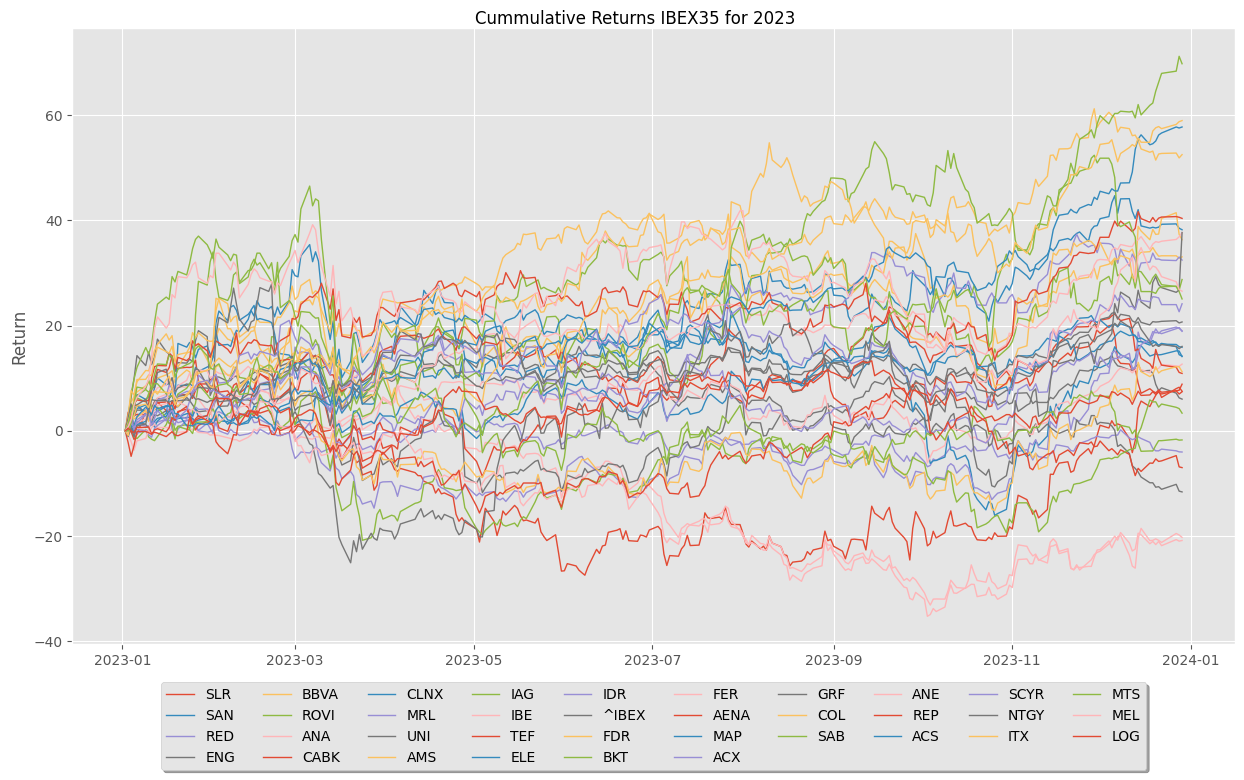

In [42]:
# Plot Cummulative Returns ^IBEX for year
fig, axs = plt.subplots(figsize=(15, 8))

# Graph
fig.suptitle(f"Cummulative Returns IBEX35 for {year}")
axs.set_ylabel('Return')
labels = []

# Loop all stock files and get cummulative return for year
for filename in os.listdir("../input"):
    f = os.path.join("../input", filename)
    df = pd.read_csv(f,index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    axs.plot(df['Cummulative_Return'].loc[year],linewidth=1)
    labels.append(filename.split('.')[0])

# Shrink current axis's height by 10% on the bottom
box = axs.get_position()
axs.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height])

# Put a legend below current axis
axs.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=10)

plt.show()

In [40]:
# Plotly
fig = make_subplots()

# Graph (1,1)
# Loop all stock files and get cummulative return for year
for filename in os.listdir("../input"):
    f = os.path.join("../input", filename)
    df = pd.read_csv(f,index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    fig.add_trace(go.Scatter(x=df['Cummulative_Return'].loc[year].index,y=df['Cummulative_Return'].loc[year],mode="lines",name=filename.split('.')[0]),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Return", row=1, col=1)

fig.update_layout(height=800, width=1300,showlegend=True,title=f"Cummulative Returns IBEX35 for {year}")

fig.show()